<br>
<div class="alert alert-info">
    <b> <h1> Life Insurance case study </h1></b>
</div>


https://www.kaggle.com/c/prudential-life-insurance-assessment/data


## Introduction

Siham, one of the largest issuers of life insurance in the Morocco, wants to develop an on-line the life insurance application process. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams. Siham wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly help Siham to better understand the predictive power of the data points in the existing assessment, enabling it to significantly streamline the process.

### Data : 

|  Num 	|   Name	|   Values	|
|-------|-------|-------|
|  1 	|  `Id` 	|   int	|
|  2	|   `Product_Info_1`	|  real 	|
|  3 	|   `Product_Info_2`	|  'D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3','A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1' 	|
|  4 	|   `Product_Info_3`	|  integer 	|
|  5 	|  `Product_Info_4`|	real   	|
|  6 	|  `Product_Info_5`|	integer 2, 3	|
|  7 	|   `Product_Info_6`|	integer 1, 3   	|
|  8 	|   `Product_Info_7`|	integer 1, 2, 3   	|
|  9 	|   `Ins_Age`|	real   	|
|  10 	|   `Ht`|	real   	|
|  11 	|   `Wt`|	real    |
|  12 	|   `BMI`|	real	|
|  13 	|   `Medical_Keyword_`|	int 1/0   	|
|  14 	|   `Response`|	integer 1 -> 8   	|

### Description of the data
* `id`: A unique identifier associated with an application.
* `Product_Info_1_to_7`: A set of normalized variables relating to the product applied for
* `Ins_Age`: Normalized age of applicant
* `Ht`: Normalized height of applicant
* `Wt`: Normalized weight of applicant
* `BMI`: Normalized BMI of applicant. Body mass index (BMI) is a measure of body fat based on height and weight.

* `Employment_Info_1-6`: A set of normalized variables relating to the employment history of the applicant.

* `InsuredInfo_1-6`: A set of normalized variables providing information about the applicant.
* `Insurance_History_1-9`: A set of normalized variables relating to the insurance history of the applicant.

* `Family_Hist_1-5`: A set of normalized variables relating to the family history of the applicant.

* `Medical_Keyword_`: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
* `Response`: This is the target variable, an ordinal variable relating to the final decision associated with an application 

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

sns.set()

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

## 1 Acquire the data


### 1.1 Read  CSV

**Q:** Load the [data] in the current path and display the head: the name of the file is trainCourse.csv.

In [2]:
data_train = pd.read_csv("./trainCourse.csv")
data_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,75573,1,D3,26,0.487179,2,1,1,0.253731,0.763636,0.267782,0.378752,0.180,9,1,0.0,2,0.375,1,2,2,2,1,2,1,2,1,1,3,NaN,3,2,3,3,NaN,0.431373,0.380282,NaN,6.0,261,2,2,1,3,2,2,1,NaN,3,2,3,3,NaN,1,3,1,1,1,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,414,1,D3,26,0.487179,2,3,1,0.194030,0.763636,0.278243,0.395231,0.050,9,1,NaN,2,NaN,1,2,2,2,1,1,1,2,1,1,3,NaN,3,2,3,3,0.608696,NaN,0.408451,NaN,4.0,261,2,1,1,3,2,2,2,NaN,3,2,1,3,NaN,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,36755,1,D4,26,1.000000,2,1,1,0.268657,0.690909,0.282427,0.473555,0.075,9,1,0.0,2,0.250,2,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.519608,0.436620,NaN,22.0,112,2,1,1,3,2,2,2,NaN,3,2,3,3,131.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,71747,1,D2,26,0.897436,2,3,1,0.537313,0.781818,0.320084,0.443418,0.125,9,1,0.0,2,0.750,1,2,3,3,1,1,1,1,1,3,1,0.002667,1,1,2,2,NaN,0.392157,0.633803,NaN,19.0,335,2,1,1,3,2,2,2,NaN,3,2,1,3,NaN,1,3,1,1,2,1,2,3,1.0,1,3,3,1,1,2,3,NaN,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,14523,1,E1,26,0.282051,2,1,1,0.432836,0.818182,0.351464,0.455603,0.400,14,1,0.0,2,1.000,1,2,3,3,1,1,1,2,1,3,1,0.003333,1,3,2,3,NaN,0.588235,NaN,0.482143,11.0,522,3,2,1,3,2,2,1,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Q:** How many samples and features that we have in the dataset

5938 sample and 128 fetures 

In [3]:
data_train.shape

(5938, 128)

### 1.2 Describing data


**Q:** Which features are available in the dataset?


In [4]:
data_train.columns.values

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4',
       'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2',
       'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', '

**Q:** Print the global information about the data and the different feature types 

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 5.8+ MB


**Q:** Which features are categorical?

In [6]:
data_train[[i for i in data_train.columns if not data_train[i].dtype in ['int64', 'float64']]].describe()


,Product_Info_2
count,5938
unique,19
top,D3
freq,1456


**Q:** Which features are numerical?

In [7]:
data_train[[i for i in data_train.columns if  data_train[i].dtype in ['int64', 'float64']]].describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.00000,5938.000000,5251.000000,5938.000000,4860.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,3386.000000,5938.000000,5938.000000,5938.000000,5938.000000,3027.000000,2528.000000,4036.000000,1741.000000,5053.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.00000,5938.000000,62.000000,5938.000000,5938.000000,5938.000000,5938.000000,1515.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,385.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,122.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000
mean,39721.078309,1.026271,24.534187,0.331447,2.006399,2.684742,1.046817,0.406994,0.707906,0.295191,0.473208,0.078528,8.67649,1.290670,0.005543,2.137757,0.359820,1.206635,2.005726,5.835803,2.880600,1.025935,1.395756,1.032671,1.721455,1.046480,2.1

**Q:** The Id Variable is it a variable that you can use in machine learning? Print the number of unique value of Id

In [8]:
data_train['Id'].describe()

count    5938.000000 
mean     39721.078309
std      22667.022094
min      18.000000   
25%      20631.500000
50%      39505.500000
75%      58965.000000
max      79146.000000
Name: Id, dtype: float64

In [9]:
data_train['Id'].nunique()

5938

5938 instances and all of them are unique so we can drop this variable and for that we will use the **drop** function from Pandas

In [10]:
data_train.drop(columns= ['Id'],inplace=True)

### 1.3 Exploration

**Q:** **What is the distribution of numerical feature values across the samples?

In [11]:
data_train[[i for i in data_train.columns if  data_train[i].dtype in ['int64', 'float64']]].describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.00000,5938.000000,5251.000000,5938.000000,4860.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,3386.000000,5938.000000,5938.000000,5938.000000,5938.000000,3027.000000,2528.000000,4036.000000,1741.000000,5053.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.00000,5938.000000,62.000000,5938.000000,5938.000000,5938.000000,5938.000000,1515.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,385.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,122.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000
mean,1.026271,24.534187,0.331447,2.006399,2.684742,1.046817,0.406994,0.707906,0.295191,0.473208,0.078528,8.67649,1.290670,0.005543,2.137757,0.359820,1.206635,2.005726,5.835803,2.880600,1.025935,1.395756,1.032671,1.721455,1.046480,2.143146,1.955877,0.001685,1.90

**Q:** are there missing values in the data? How many? give the ration for each feature

In [12]:
# Way 1 : no nan data
data_train.notna().sum().loc[data_train.notna().sum() < data_train.shape[0]]

Employment_Info_4      5251
Employment_Info_6      4860
Insurance_History_5    3386
Family_Hist_2          3027
Family_Hist_3          2528
Family_Hist_4          4036
Family_Hist_5          1741
Medical_History_1      5053
Medical_History_10     62  
Medical_History_15     1515
Medical_History_24     385 
Medical_History_32     122 
dtype: int64

In [13]:
#Way 2 : only nan data
data_train.isna().sum().loc[data_train.isna().sum() >0]

Employment_Info_4      687 
Employment_Info_6      1078
Insurance_History_5    2552
Family_Hist_2          2911
Family_Hist_3          3410
Family_Hist_4          1902
Family_Hist_5          4197
Medical_History_1      885 
Medical_History_10     5876
Medical_History_15     4423
Medical_History_24     5553
Medical_History_32     5816
dtype: int64

In [14]:
# Ratio
data_train.isna().sum().loc[data_train.isna().sum() >0]/data_train.shape[0]

Employment_Info_4      0.115696
Employment_Info_6      0.181543
Insurance_History_5    0.429774
Family_Hist_2          0.490232
Family_Hist_3          0.574267
Family_Hist_4          0.320310
Family_Hist_5          0.706804
Medical_History_1      0.149040
Medical_History_10     0.989559
Medical_History_15     0.744864
Medical_History_24     0.935163
Medical_History_32     0.979454
dtype: float64

**Q:** Now let's look at the variable that we are interested in predicting ** the Y variable ** which is **response**. Using the count function, display the class imbalance 

In [15]:
data_train["Response"].value_counts(normalize=True)

1    0.747727
0    0.252273
Name: Response, dtype: float64

##  2 Exploratory Data Analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

* **Correlating.**: We want to know how well does each feature correlate with Survival. 
* **Completing.** : We want to complete missing values
* **Correcting.**: We want de drop some features
* **Creating.**: We want to creat new features


**Q:** Draw a big picture of the data using ProfileReport

In [16]:
profile = ProfileReport(data_train, title='Life Insurance', html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

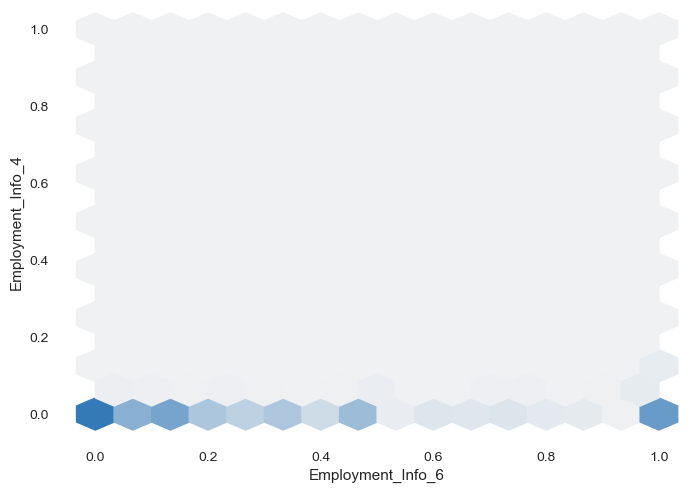

In [17]:
profile.to_notebook_iframe()

It can be very interesting to look at the *distribution* of our variables, comparing them to the *output variable*.

Here we plot it using the seaborn library.

In [18]:
features = data_train.drop(columns=["Response"], inplace=False).columns

def PlotDistributiontest(X_train,Y_train,nb_of_features=20):
    plt.figure(figsize=(12,nb_of_features*4))
    gs = gridspec.GridSpec(nb_of_features, 2) #Customizing Figure Layouts Using GridSpec 
    for i in range(nb_of_features):
        cn = features[i]
        print(cn)
        ax = plt.subplot(gs[i,0])
        sns.distplot(X_train[Y_train == 0][X_train.columns[i]], bins=50,color='red') 
        ax.set_xlabel('')
        ax.set_title('histogram of feature of risk 0: ' + str(cn))

        ax = plt.subplot(gs[i,1])
        sns.distplot(X_train[Y_train == 1][X_train.columns[i]], bins=50,color='green')
        ax.set_xlabel('')
        ax.set_title('histogram of feature of risk 1: ' + str(cn))
        
    plt.show()

ValueError: could not convert string to float: 'D3'

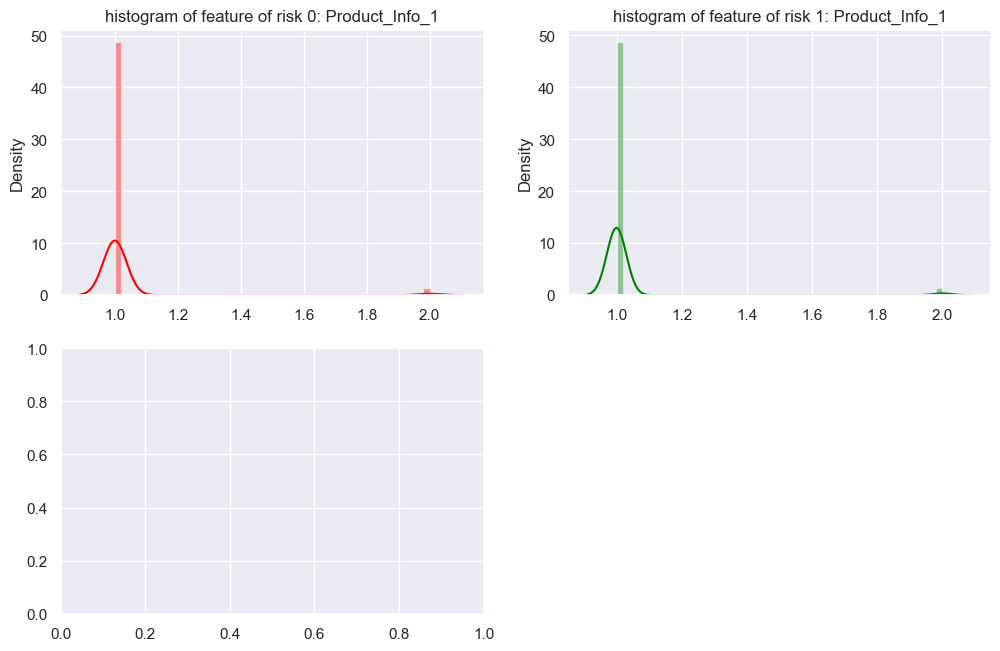

In [19]:
PlotDistributiontest(data_train.drop(columns=["Response"], inplace=False),data_train["Response"],nb_of_features=5)

In [ ]:
def PlotDistribution(X_train,Y_train,nb_of_features=20):
    plt.figure(figsize=(12,nb_of_features*4))
    gs = gridspec.GridSpec(nb_of_features, 1) #Customizing Figure Layouts Using GridSpec 
    for i in range(nb_of_features):
        cn = features[i]
        
        ax = plt.subplot(gs[i])
        sns.distplot(X_train[Y_train == 0][X_train.columns[i]], bins=50,color='red') 
        sns.distplot(X_train[Y_train == 1][X_train.columns[i]], bins=50,color='green')
        ax.set_xlabel('')
        ax.set_title('histogram of feature : ' + str(cn))
        
    plt.show()

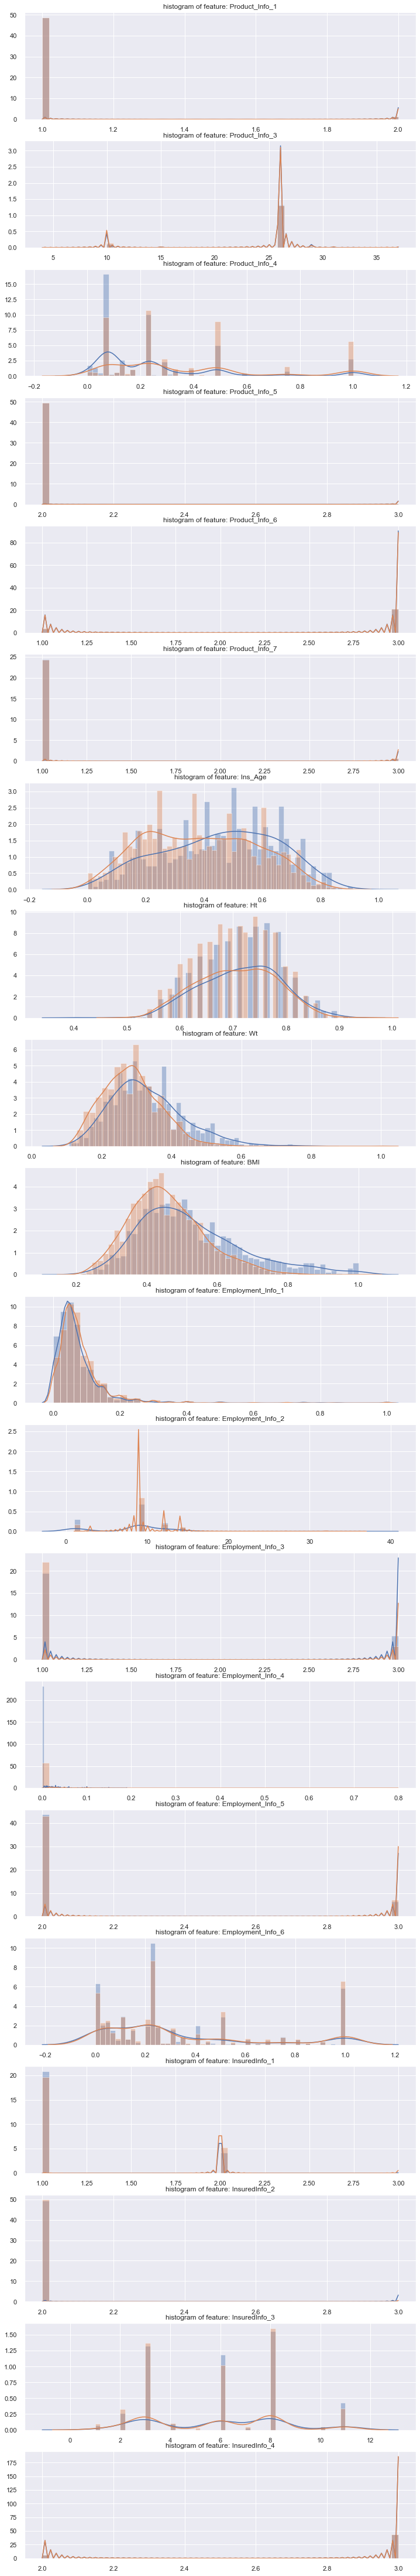

In [ ]:
PlotDistribution(data_train.drop(columns=["Response"], inplace=False),data_train["Response"]nb_of_features=20)

## 3 Preparing the data

### 3.1 Splitting the Dataset into Training set and Test Set

**Q:** Splitting the dataset between X and y

In [ ]:
y = dataSet["Response"]
X = dataSet.drop(["Response"],axis=1)

**Q:** Split the data between train 80%  and test 20% in stratified manner (X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import train_test_split



### 3.2  Sampling and co-variance shift

We have now a training set of instances, and a test set and we have Labels and the name of the **Y** variable let's taka a closer look. 

**Q:** Look at the class imbalance difference between the test and train set .

1    0.74615
0    0.25385
Name: Response, dtype: float64

1    0.751403
0    0.248597
Name: Response, dtype: float64

**Q:** Check that there isn't a co-variance shift between the train and the test.

In [282]:
# Step 1 :  remove nan column

#TODO

((4156, 115), (1782, 115))

In [222]:
# Step 2 : Run a model to check if we can make a difference between the train and test
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

clf =  RandomForestClassifier(n_estimators=150, max_depth=2)

predictions = np.zeros(y_shift.shape)

# TODO

Feature Product_Info_1: ROC-AUC 0.5165770500427221


KeyboardInterrupt: 

### 3.3 Data encoding

We have seen one hot encoding (or creation of dummy variables) let 's use a sickit learn package to do the trick. Remember our categorical variable Product_Info_2:

**Q:** Print the different modality of this variable

array(['D2', 'D3', 'D4', 'A8', 'A6', 'A1', 'C4', 'E1', 'D1', 'A7', 'A3',
       'A5', 'B2', 'A2', 'B1', 'C1', 'C2', 'A4', 'C3'], dtype=object)

We will now create 19 dummy variables oner per modality of the Product_Info_2 variable and populate those with 0 and 1 accoridng to the instances. There are several way for doing this.  

* we can use OneHotEncoder or MultiLabelBinarizer or LabelBinarizer or get_dummies
* https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/
* https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder

**Q:** Use any method for encoding the labels of Product_Info_2 feature: . Place those variables in a separate dataframe X_train_dum, and X_test_dum. Also print the head the obtained result

In [284]:
from sklearn.preprocessing import LabelBinarizer

#TODO

We now have 19 columns labeled 0 through 18 which we are going to quickly rename using a for loop function. 

**Q:** Use a list to rename the columns of X_train_dum, and X_test_dum as 'Product_Info_2_' + 'modality'

,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
5419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Q:** Add the X_train_dum, and X_test_dum to the orginal data and remove the categorical variable using pandas join function

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
5419,1,26,0.230769,2,3,1,0.447761,0.854545,0.330544,0.393747,0.120,9,1,NaN,2,0.275,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,2,NaN,0.441176,NaN,0.392857,7.0,48,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4565,1,26,0.076923,2,3,1,0.552239,0.763636,0.299163,0.428189,0.039,9,1,NaN,2,0.010,1,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.656863,NaN,0.535714,223.0,389,2,2,1,3,3,1,2,NaN,3,2,3,2,NaN,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4063,1,26,0.487179,2,1,1,0.253731,0.600000,0.225941,0.466779,0.122,9,1,NaN,2,NaN,1,2,10,3,1,2,1,2,1,3,1,0.000600,1,3,2,3,0.420290,NaN,0.366197,NaN,12.0,261,2,1,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,52.0,1,3,3,2,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5716,1,26,0.076923,2,1,1,0.104478,0.818182,0.414226,0.546621,0.040,9,1,0.0,2,0.010,1,2,8,3,1,1,3,2,1,1,3,NaN,3,2,3,3,0.333333,NaN,0.295775,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 3.4 Data imputaion

Fast and classic Imputation transformer for completing missing values.
* https://scikit-learn.org/stable/modules/impute.html

**Q:** use impute to fill missing values (before check of missing values)

In [287]:
## Check if there are any missing values


True

In [288]:
## Way 1 : Impute your values using pandas (fillna)


In [289]:
## Way 2 : Impute using SimplteImputer

from sklearn.impute import SimpleImputer



### 3.5 Scaling the data 


**Q:** Normalizing by the range of the data Min: MinMaxScaler

In [65]:
# X = (X - min(X)) / (max(X) - min(X))    range between 0 and 1

from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train_minmax = 
X_test_minmax = 

#### b) StandardScaler : Standardize features by removing the mean and scaling to unit variance

In [66]:
# X = (X - mean(X)) / std(X)   range between 0 and 1
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 4. Model Baseline

In [295]:
X_train.shape,y_train.shape

((4156, 144), (4156,))

In [296]:
#Evaluate metric(s) by cross-validation and also record fit/score times. Use Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate



In [297]:
cv_dt

{'fit_time': array([0.13148093, 0.16937041, 0.14713264, 0.13148093, 0.13148093]),
 'score_time': array([0.        , 0.00205541, 0.        , 0.        , 0.0156517 ]),
 'test_score': array([0.73197115, 0.73766546, 0.73285199, 0.73525872, 0.755716  ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [299]:
print("Mean score: ", cv_dt['test_score'].mean(), "Mean std: ", cv_dt['test_score'].std())


Mean score:  0.738692666388966 Mean std:  0.008739947804303618


### 5. Feature Selection

#### 5.1 Pearson Correlation

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.

$$p_{X,Y} = \frac{cov(X,Y)}{sigma_{X}sigma_{Y}}$$

$$ \text{ where cov is the covariance,   }  sigma_{X} \text{  is the standard deviation of X and }  sigma_{Y} \text{  is the standard deviation of Y} $$

In [300]:
# Pearson Correlation
from scipy.stats import pearsonr

** NB **
The function below computes the pearson correlation using pearsonr

In [320]:
def TabPearsonr(X_train,y_train):
    """
    Computes the pearson correlation between each column of X_train and the column Y_train.
    
    Arguments:
    X_train -- learning set
    Y_train -- learning output
    Labels -- names of the features
    
    Returns:
    TabResultsPearson -- the table of the normalized mutual informations such as
    TabResultsPearson[j] = PearsonCorr(X_train[:,i],Y_train)
    """
    ListPearsonCorr = []
    for feature in features:
        ListPearsonCorr.append(pearsonr(X_train[feature],y_train))
    
    TabResultsPearson = pd.DataFrame(ListPearsonCorr,columns=['Pearson Correlation','P-Value'],index=features)
    #TabResultsPearson = TabResultsPearson.transpose()
    return TabResultsPearson


In [321]:
TabResultsPearson = TabPearsonr(X_train,y_train)
TabResultsPearson

,Pearson Correlation,P-Value
Product_Info_1,-0.007530,6.274724e-01
Product_Info_3,-0.024184,1.190362e-01
Product_Info_4,0.170987,1.233114e-28
Product_Info_5,-0.002511,8.714329e-01
Product_Info_6,-0.016011,3.021099e-01
Product_Info_7,0.012036,4.379217e-01
Ins_Age,-0.147383,1.288509e-21
Ht,-0.050658,1.087273e-03
Wt,-0.219753,1.263505e-46
BMI,-0.244418,1.376676e-57


In [325]:
# https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/
def SelectBestFeatures(TabResultsPearson,thresPVal=0.05):
    """
    Extracts the features that are correlated the most to Y_train and that the pValue is under thresPVal.
    
    Arguments:
    TabResultsPearson -- table of the correlations
    thresPVal -- pValue threshold
    
    Returns:
    ListSelectedFeatures -- List of selected features
    """
    
    potentiel = TabResultsPearson[TabResultsPearson['P-Value']< thresPVal]
    MAD = (potentiel.abs() - potentiel.abs().median()).abs().median()
    print (potentiel)
    #IdxCols = (TabResultsPearson.loc['P-Value',:] < thresPVal).nonzero()[0]
    #TabResultsPearsonLoc = TabResultsPearson.iloc['Pearson Correlation',IdxCols]
    
    #MAD = (TabResultsPearsonLoc.abs() \    - TabResultsPearsonLoc.abs().median()).abs().median()
    #ListSelectedFeatures = TabResultsPearsonLoc.loc[TabResultsPearsonLoc.abs() > TabResultsPearsonLoc.abs().median() + MAD]
    #ListSelectedFeatures = ListSelectedFeatures.index
    #ListSelectedFeatures = ListSelectedFeatures.values
    #return ListSelectedFeatures

In [326]:
ListSelectedFeatures = SelectBestFeatures(TabResultsPearson,thresPVal=0.05)

print("Selected Features : ")
print(ListSelectedFeatures)


                     Pearson Correlation       P-Value
Product_Info_4       0.170987             1.233114e-28
Ins_Age             -0.147383             1.288509e-21
Ht                  -0.050658             1.087273e-03
Wt                  -0.219753             1.263505e-46
BMI                 -0.244418             1.376676e-57
Employment_Info_2    0.067474             1.339757e-05
Employment_Info_3   -0.119192             1.266668e-14
InsuredInfo_1        0.054633             4.257775e-04
InsuredInfo_2       -0.072291             3.085304e-06
InsuredInfo_3       -0.030735             4.755900e-02
InsuredInfo_5       -0.112270             3.913994e-13
InsuredInfo_6        0.076950             6.813880e-07
InsuredInfo_7       -0.071328             4.168195e-06
Insurance_History_2 -0.075505             1.098657e-06
Insurance_History_3  0.049369             1.454249e-03
Insurance_History_4 -0.045815             3.134883e-03
Insurance_History_5  0.081164             1.610160e-07
Insurance_

In [319]:
X_train2 = pd.DataFrame(X_train2,columns=Cols)
X_test2 = pd.DataFrame(X_test2,columns=Cols)

newX_train = X_train2[ListSelectedFeatures].copy()
newX_test = X_test2[ListSelectedFeatures].copy()

NameError: name 'ListSelectedFeatures' is not defined

#### 2.2 Wrapped method


#### Recursive Feature Elimination

The RFE procedure removes one by one the less significative variables using the chosen learning model; in this case, we use the random forests.

In [329]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier



In [68]:
sortedIdSelected = np.argsort(tf.ranking_)
sortedCols = newX_train.columns[sortedIdSelected]
newX_train[sortedCols].head()

,Product_Info_4,Medical_Keyword_3,Medical_History_39,Medical_History_23,Medical_History_15,Medical_History_4,Medical_History_16,BMI,Wt,Ins_Age,...,Product_Info_2_D1,Employment_Info_3,Medical_Keyword_23,Medical_Keyword_15,Product_Info_2_D4,Medical_History_6,Medical_History_40,Medical_History_33,InsuredInfo_5,Medical_Keyword_48
0,0.271576,0,3.541769,0.000000,0.101020,0.000000,0.00000,2.853852,2.518814,3.332864,...,3.2421,2.846872,3.267106,2.542699,0.000000,4.421963,8.061783,0.000000,0,0
1,0.814729,0,3.541769,0.000000,2.505290,0.000000,0.00000,2.456277,2.332235,1.287698,...,0.0000,0.000000,0.000000,0.000000,2.581342,4.421963,8.061783,3.274744,0,0
2,0.271576,0,3.541769,2.350223,2.505290,2.099727,0.00000,0.769136,0.699670,2.120914,...,3.2421,0.000000,0.000000,0.000000,0.000000,4.421963,8.061783,3.274744,0,0
3,0.814729,0,3.541769,2.350223,0.525303,0.000000,0.00000,1.289217,1.282729,0.681722,...,0.0000,0.000000,0.000000,0.000000,2.581342,4.421963,8.061783,3.274744,0,0
4,0.271576,0,3.541769,0.000000,0.000000,0.000000,2.70399,1.090129,1.515953,2.045167,...,3.2421,0.000000,0.000000,2.542699,0.000000,4.421963,8.061783,3.274744,0,0


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
def modelfit(X_train,Y_train,X_test,Y_test,ListSelectFeatures,Labels):
    """
    Computes the 200-trees RandomForest fitted model on Y_train using the selected features.
    Then predicts on X_test.
    
    Arguments:
    X_train -- learning set
    Y_train -- learning output
    X_test -- test set
    Y_test -- test output
    ListSelectFeatures -- list of selected features
    Labels -- names of the features
    
    Returns:
    pred -- prediction vector
    MSE -- mean squared error
    R2 -- R2 score
    
    NB :
    model = RFModel.fit(X_train,Y_train)
    pred = model.predict(X_test)
    """
    
    print("MSE=",mean_squared_error(pred,Y_test))
    print("R2=",r2_score(Y_test,pred))
    return pred,mean_squared_error(pred,Y_test), r2_score(Y_test,pred)

Dummy example :

In [71]:
## Example

LabelsRand = range(50)
matRand_Train = np.array([[1.0] * 30 + [0.0] * 20] * 50 + [[1.0] * 30 + [0.0] * 20] * 50)
yRand_Train = np.array([1] * 50 + [0] * 50)
matRand_Test = np.array([[0.0] * 25 + [1.0] * 25] * 40)
yRand_Test = np.array([0] * 20 + [0] * 20)
print(matRand_Train.shape)
ListSelectFeatures = range(20)

(100, 50)


In [72]:
modelfit(matRand_Train,yRand_Train,matRand_Test,yRand_Test,range(15),LabelsRand);


MSE= 0.0
R2= 1.0
